In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(r"M:\Machine Learning Engineer\Data\penguins_lter.csv")

In [28]:
df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [33]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [30]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [34]:
df.drop(columns=['studyName', 'Sample Number','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)','Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg','Region'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [40]:
df[~df['Sex'].isin(['MALE','FEMALE'])]

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
336,Gentoo penguin (Pygoscelis papua),Biscoe,44.5,15.7,217.0,4875.0,.


In [41]:
df.drop(df[df['Sex']=='.'].index,inplace=True)

In [42]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
for i in df.select_dtypes('object').columns:
    print(i)
    print(df[i].unique())
    print('============')

Species
['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']
Island
['Torgersen' 'Biscoe' 'Dream']
Sex
['MALE' 'FEMALE']


In [44]:
df['Species']=df['Species'].apply(lambda x:x.split()[0])

In [45]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [46]:
df.shape

(333, 7)

In [47]:
categoricalcolumns=df.select_dtypes('object').columns
numericalcolumns=df.select_dtypes('number').columns

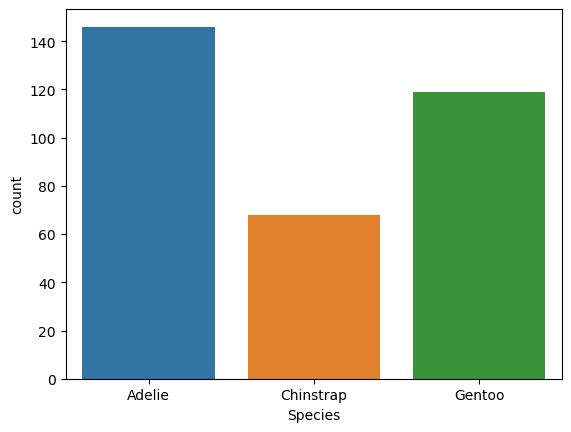

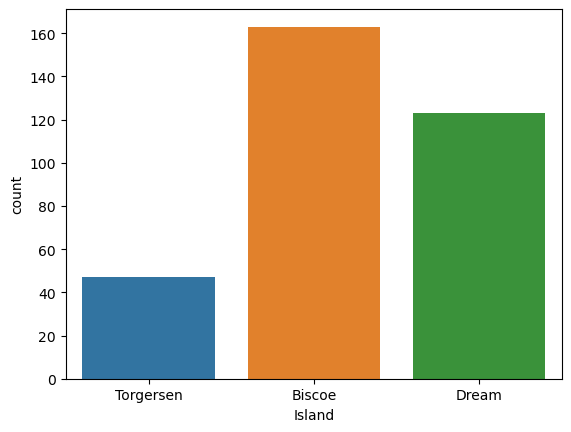

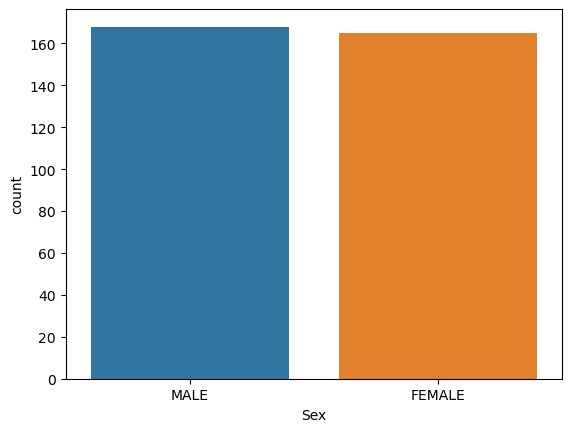

In [48]:
for col in categoricalcolumns:
    sns.countplot(data=df,x=col)
    plt.show()

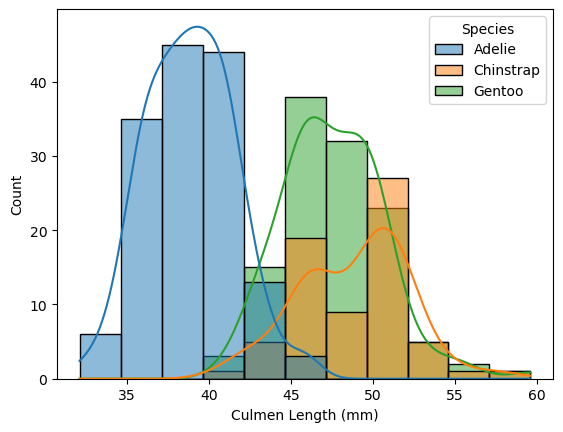

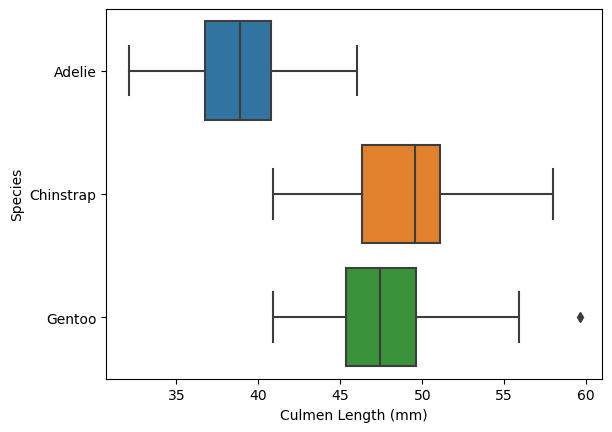

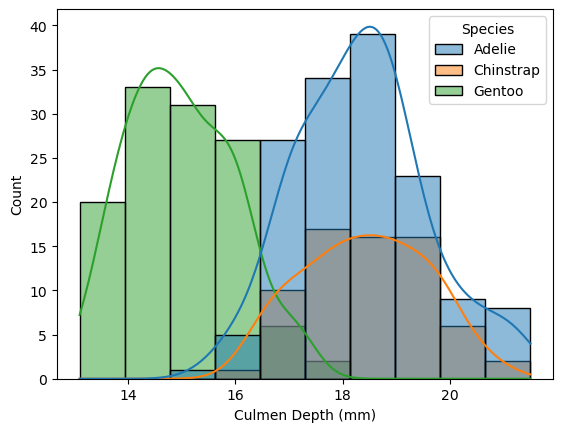

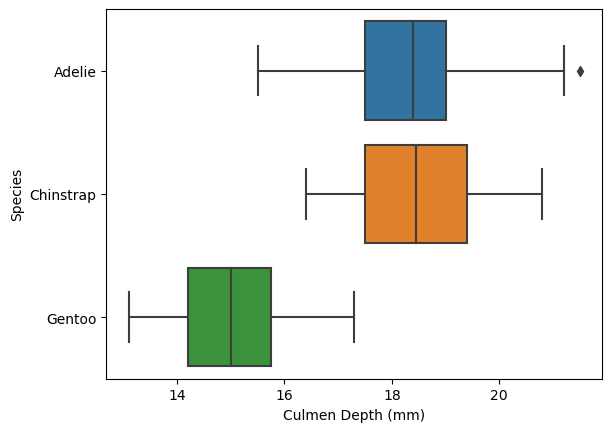

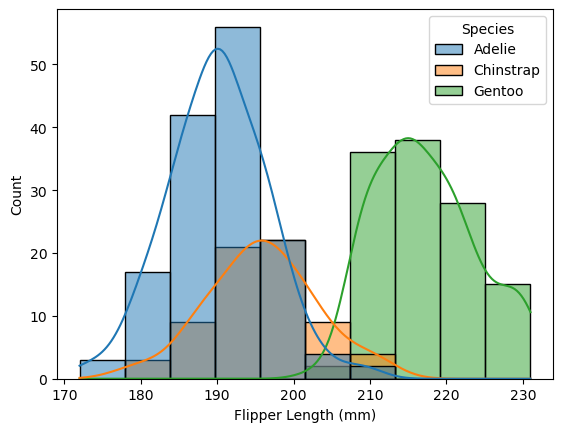

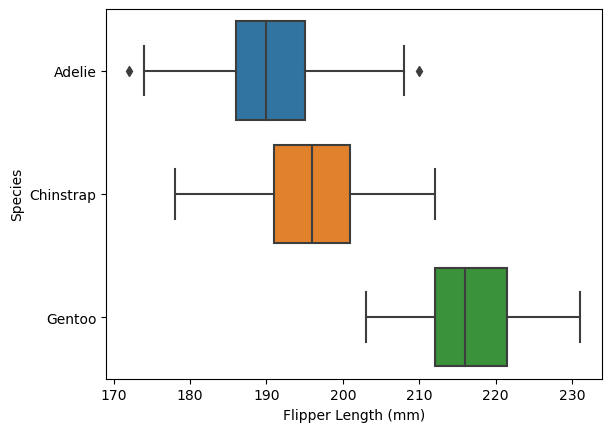

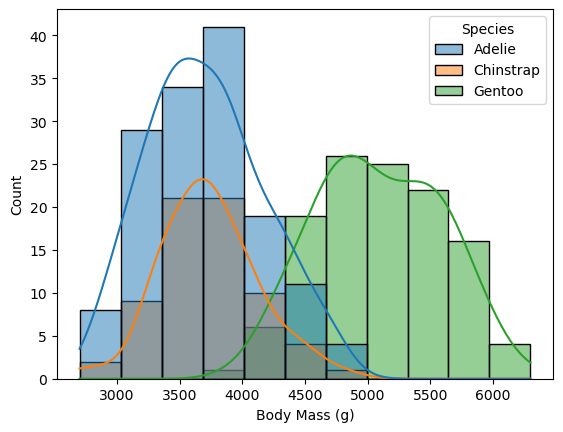

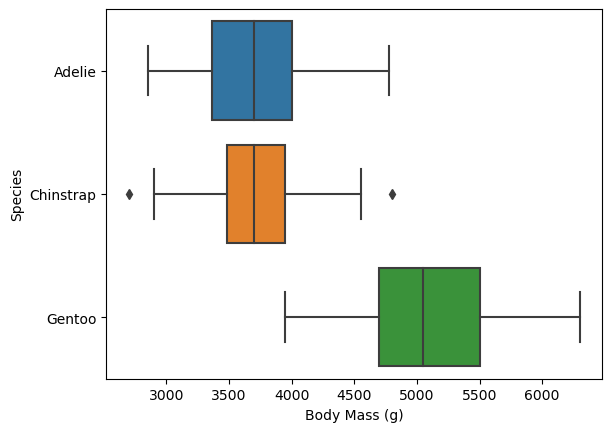

In [49]:
for col in numericalcolumns:
    sns.histplot(data=df,x=col,kde=True,hue='Species')
    plt.show()
    sns.boxplot(data=df,x=col,y='Species')
    plt.show()

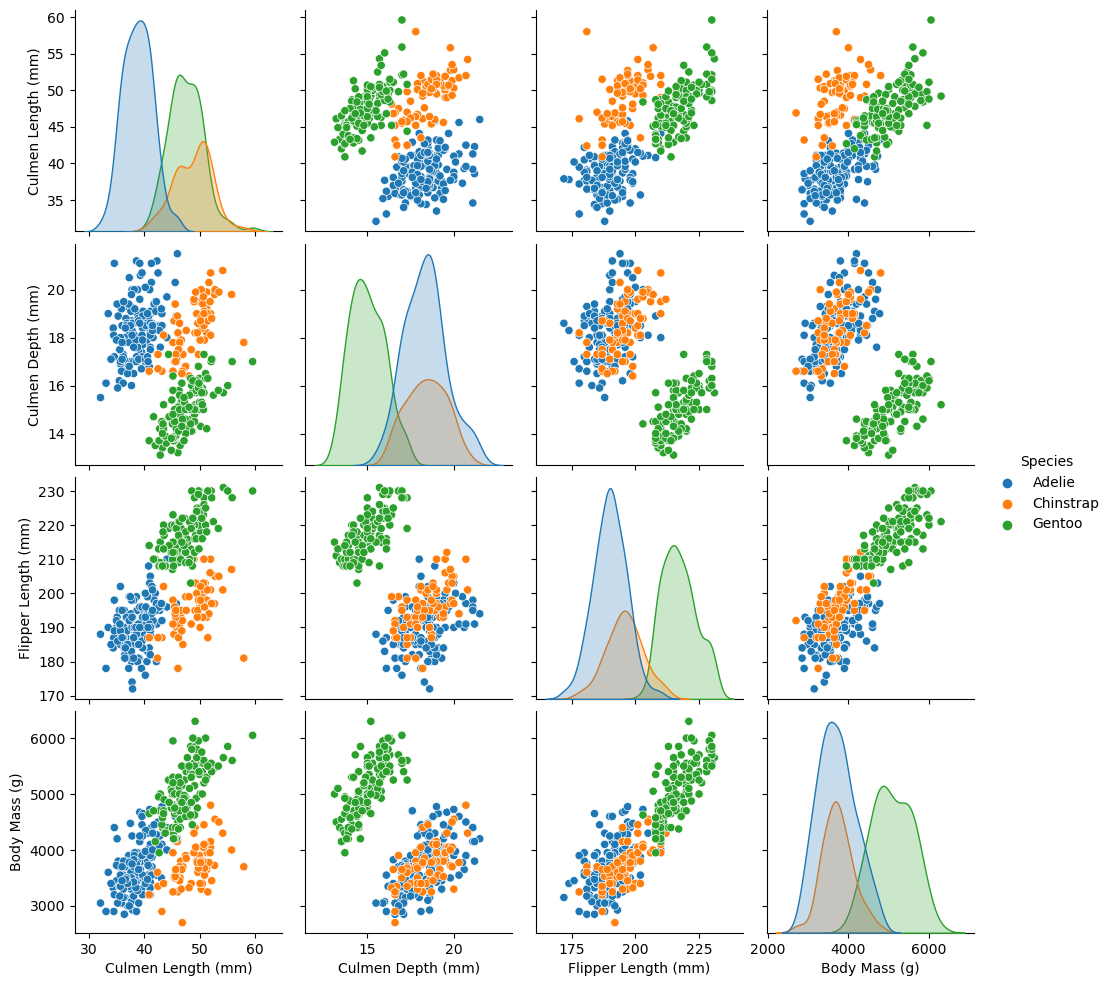

In [50]:
sns.pairplot(data=df,hue='Species')

C:\Users\ELZAHBIA\AppData\Local\Temp\ipykernel_11720\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

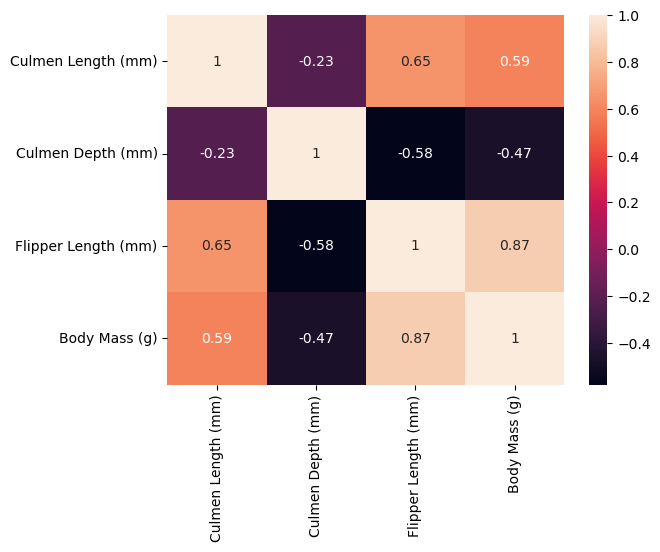

In [51]:
sns.heatmap(df.corr(),annot=True)

In [52]:
sub_df=df[df['Species']=='Adelie']

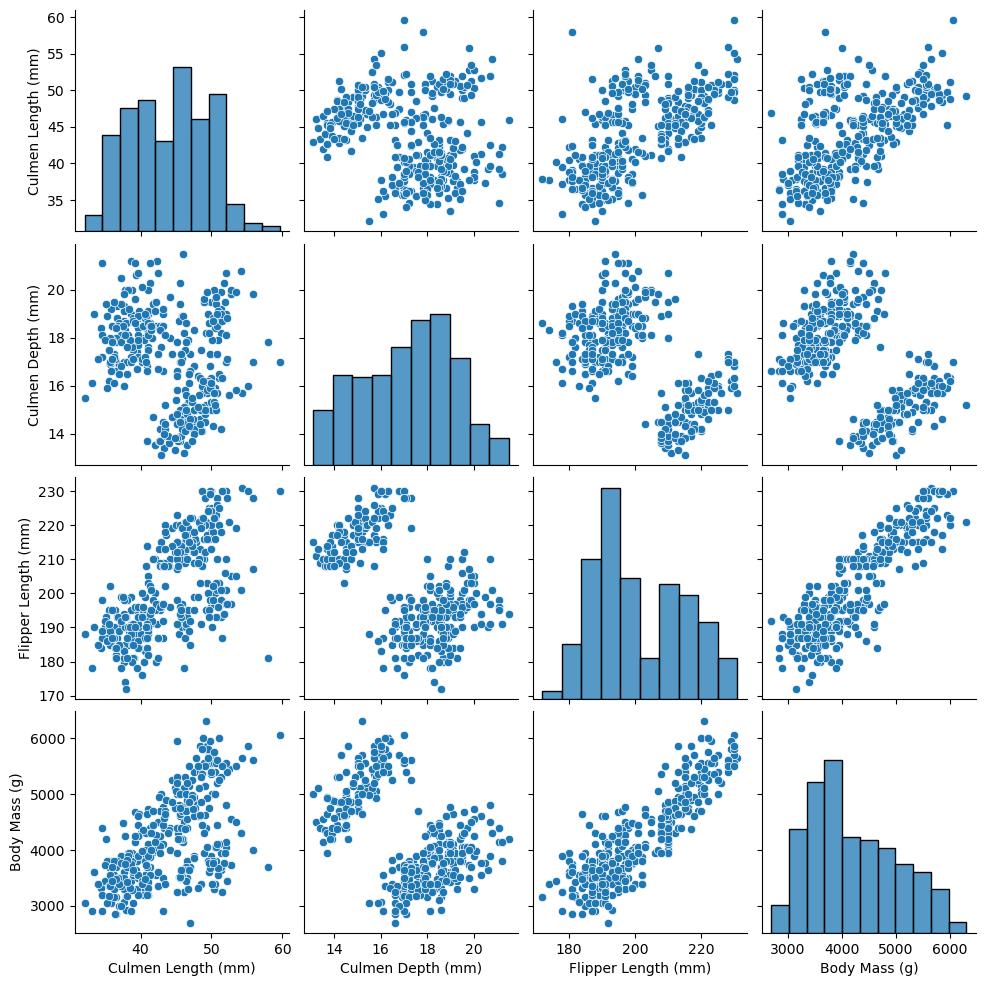

In [53]:
sns.pairplot(data=df)

In [54]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop(columns='Species')
y=df['Species']
categoricalcolumn=X.select_dtypes('object').columns
numericalcolumn=X.select_dtypes('number').columns
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=101)
print(categoricalcolumn)
print(numericalcolumn)



Index(['Island', 'Sex'], dtype='object')
Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')


,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [64]:
X_test.shape,X_train.shape


((84, 6), (249, 6))

In [69]:
mytransformer=ColumnTransformer([
    ('num',StandardScaler(),numericalcolumn),
    ('categ',OneHotEncoder(),categoricalcolumn)])

X_train=mytransformer.fit_transform(X_train)
X_test=mytransformer.transform(X_test)

In [70]:
X_test.shape,X_train.shape

((84, 9), (249, 9))

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier


In [87]:
def trainmodel(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return y_pred
    

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



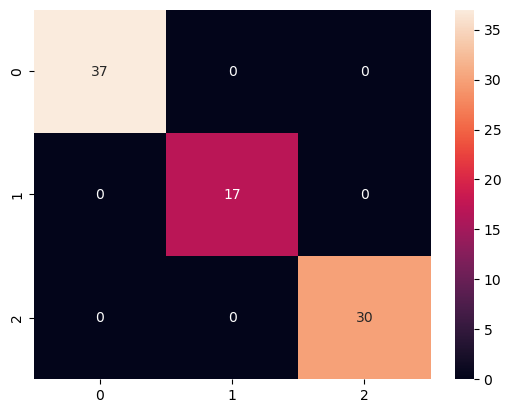

In [88]:
lgr=LogisticRegression()
y_pr=trainmodel(lgr,X_train,y_train,X_test)
sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show
print(classification_report(y_pr,y_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



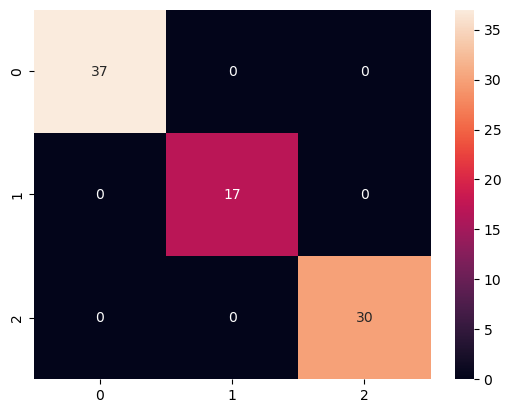

In [90]:
knn=KNeighborsClassifier()
y_prp=trainmodel(knn,X_train,y_train,X_test)
sns.heatmap(confusion_matrix(y_prp,y_test),annot=True)
plt.show
print(classification_report(y_prp,y_test))

In [91]:
RF=RandomForestClassifier()
Boost1=AdaBoostClassifier() #Worst one
Boost2=GradientBoostingClassifier()
y_pr1=trainmodel(RF,X_train,y_train,X_test)
y_pr2=trainmodel(Boost1,X_train,y_train,X_test)
y_pr3=trainmodel(Boost2,X_train,y_train,X_test)

c:\Users\ELZAHBIA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


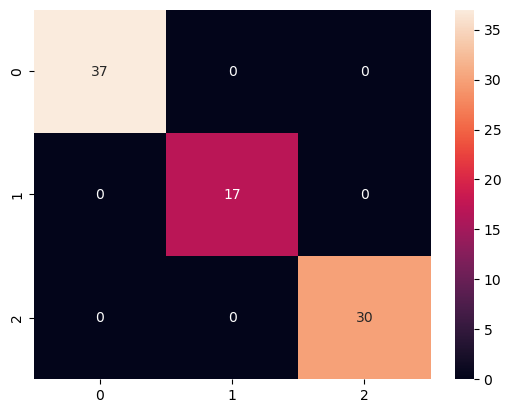

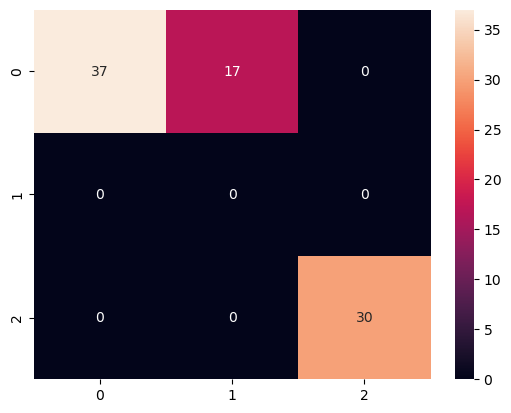

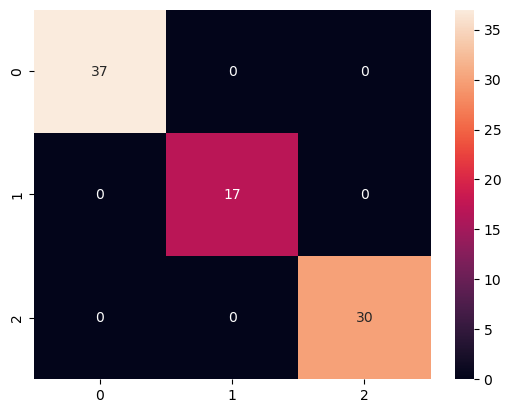

In [94]:
sns.heatmap(confusion_matrix(y_pr1,y_test),annot=True)
plt.show()
sns.heatmap(confusion_matrix(y_pr2,y_test),annot=True)
plt.show()
sns.heatmap(confusion_matrix(y_pr3,y_test),annot=True)
plt.show()

In [95]:
print(classification_report(y_pr1,y_test))
print(classification_report(y_pr2,y_test))
print(classification_report(y_pr3,y_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

              precision    recall  f1-score   support

      Adelie       1.00      0.69      0.81        54
   Chinstrap       0.00      0.00      0.00         0
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.80        84
   macro avg       0.67      0.56      0.60        84
weighted avg       1.00      0.80      0.88        84

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy        

c:\Users\ELZAHBIA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ELZAHBIA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ELZAHBIA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
from sklearn.preprocessing import OrdinalEncoder

In [116]:
X_xgb = df.drop(columns='Species')
y_xgb = df['Species']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_xgb)

# Split the dataset
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_encoded, stratify=y_encoded, random_state=42)
mytransformer=ColumnTransformer([
    ('num',StandardScaler(),numericalcolumn),
    ('categ',OneHotEncoder(),categoricalcolumn)])

X_train_xgb=mytransformer.fit_transform(X_train)
X_test_xgb=mytransformer.transform(X_test)
# Initialize and fit the XGBoost model
Boost3 = xgb.XGBClassifier(
    random_state=42,
    learning_rate=0.01,
    booster='gbtree',
    nthread=2,
    eval_metric='mlogloss',
    verbosity=1
)

Boost3.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_prx = Boost3.predict(X_test_xgb)



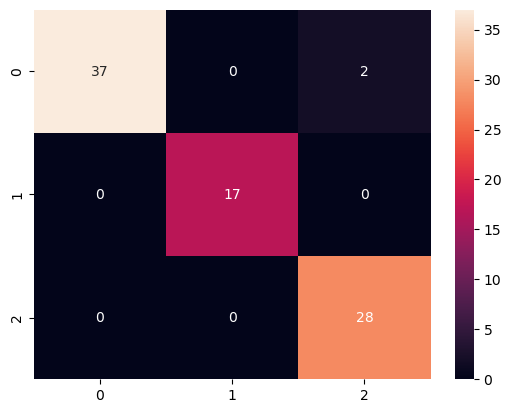

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       1.00      1.00      1.00        17
           2       0.93      1.00      0.97        28

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [117]:
sns.heatmap(confusion_matrix(y_prx,y_test_xgb),annot=True)
plt.show()
print(classification_report(y_prx,y_test_xgb))